In [11]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import hashlib
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import src.img as iImg
df = pd.read_parquet("data/dataset.parquet.gzip")
df = df[df.Place == "Paris"].reset_index(drop=True)
print(len(df.Source.unique()))
df

549


,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Thématique,Budget global du projet lauréat,Echelle du Budget participatif,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,...,Place,Type,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,By improving the bridge and fostering a pedest...,Social cohesion,Culture and community identity,Neighbourhood,4,Enhancing community connection and inclusiveness.,Beautification project for Louis Philippe Bridge.,False
1,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,The project aims to enhance the aesthetic appe...,Attractiveness,Mobility,Neighbourhood,4,Louis Philippe Bridge enhancement project.,Beautification project for Louis Philippe Bridge.,False
2,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,By enhancing the bridge's environment and addi...,Well-being,Living and working environment,Neighbourhood,3,"Bridge improvement benefits residents, limited.",Beautification project for Louis Philippe Bridge.,False
3,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,The beautification of the Louis Philippe Bridg...,Attractiveness,Culture and community identity,Neighbourhood,3,Bridge beautification enhances cultural identity.,Beautification project for Louis Philippe Bridge.,False
4,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,The project aims to enhance the Louis Philippe...,Attractiveness,Living and working environment,Neighbourhood,4,Louis Philippe bridge enhancement project.,Beautification project for Louis Philippe Bridge.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,The various innovative solutions for waste red...,Resilience,"Innovation, creativity and research",Neighbourhood,3,Innovative waste solutions enhance resilience.,Waste reduction and resource sharing.,False
7338,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,The text emphasizes the need to minimize waste...,Responsible resource use,Economy and sustainable production and consump...,Neighbourhood,5,"Minimize waste, promote sustainability.",Waste reduction and resource sharing.,False
7339,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,Although resilience in the context of environm...,Resilience,Safety and security,Neighbourhood,2,Resilience needs crisis management emphasis.,Waste reduction and resource sharing.,False
7340,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,The initiatives described in the text aim t

In [24]:
import src.img as iImg
df = pd.read_parquet("data/xls/db.parquet.gzip")
df = df[~df.Source.str.contains("data/pages")]
df = df[df.Place == "Paris"]
items = df.Source.unique()
print(len(items))
df = df.drop_duplicates(subset=["Source","Purpose","Issue"])
df.head(3)

549


,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed,model,timestamp
0,False,BudgetParis,Paris,Activities,"Fondé récemment, l'atelier de jardinage du col...",The gardening workshop aims to enhance the env...,Preservation and improvement of environment,Biodiversity and ecosystem services,Neighbourhood,5,Gardening workshop promotes biodiversity and s...,School gardening project completed.,False,gpt-4o-mini,"10/23/2024, 20:31:09"
1,False,BudgetParis,Paris,Activities,"Fondé récemment, l'atelier de jardinage du col...",The initiative to green the courtyard with pla...,Attractiveness,Living and working environment,Neighbourhood,4,Greening courtyard enhances appeal and community.,School gardening project completed.,False,gpt-4o-mini,"10/23/2024, 20:31:09"
2,False,BudgetParis,Paris,Activities,"Fondé récemment, l'atelier de jardinage du col...",By establishing a gardening workshop and provi...,Well-being,Health and care in the community,Neighbourhood,4,Gardening improves nutrition and well-being.,School gardening project completed.,False,gpt-4o-mini,"10/23/2024, 20:31:09"


/home/kelu/projets/pariso37k/src/img.py:137: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels,fontproperties=fontprop, fontsize=24, weight='bold')
/home/kelu/projets/pariso37k/src/img.py:152: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels,fontproperties=fontprop, fontsize=24, weight='bold')


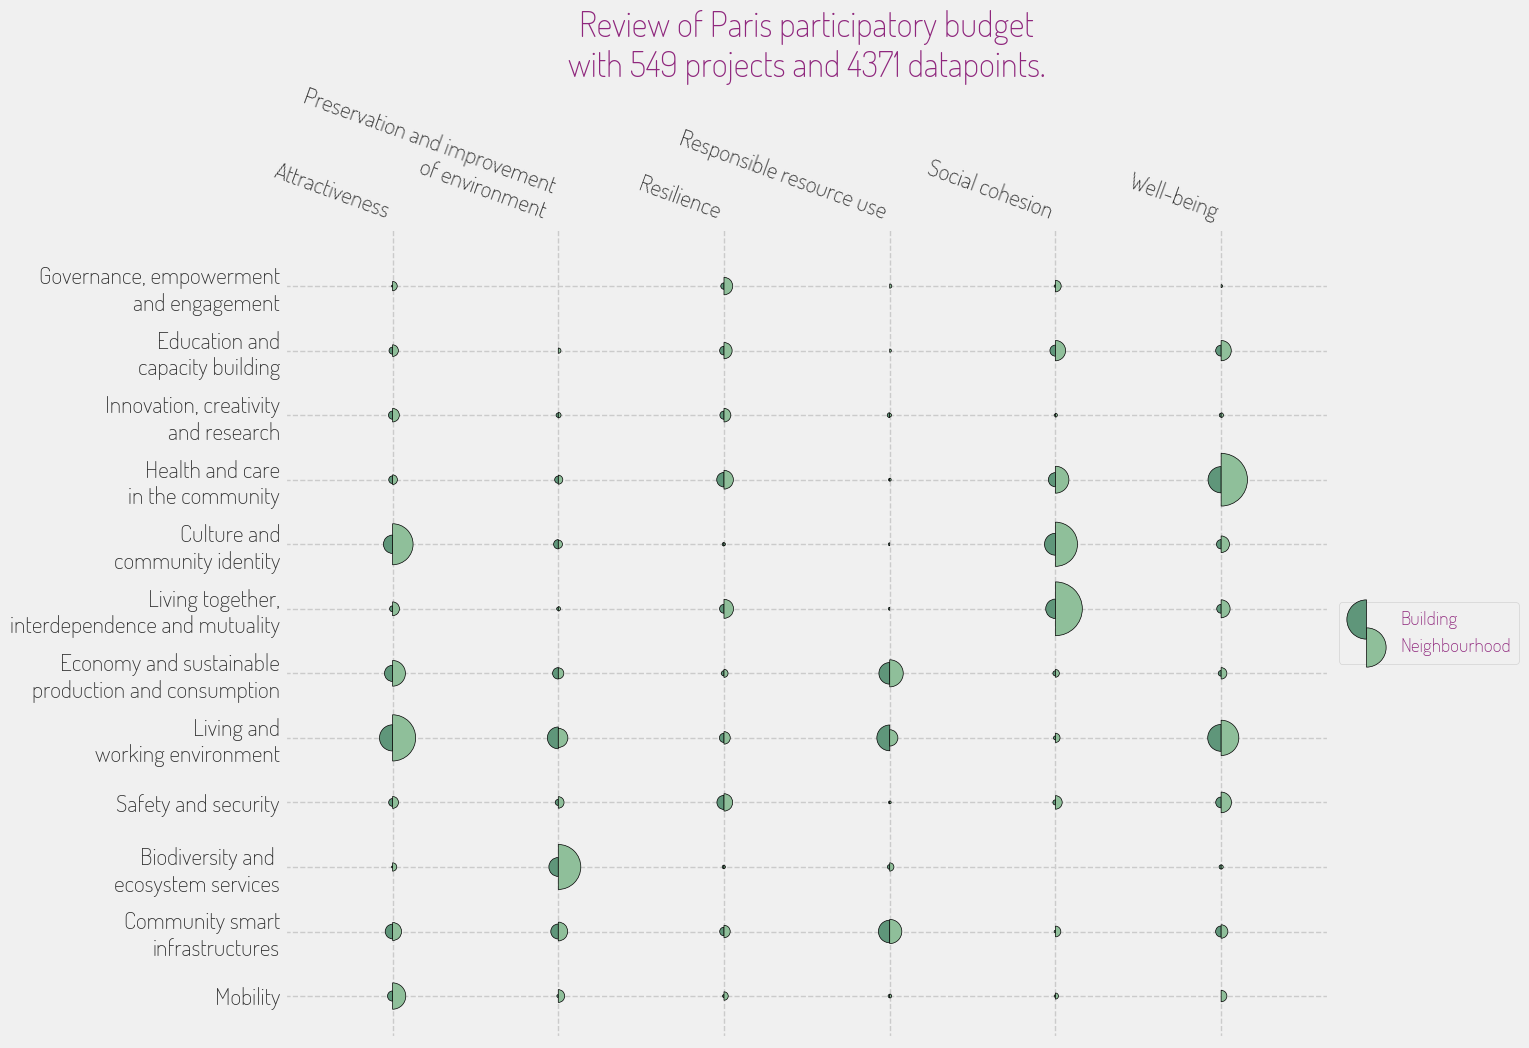

In [21]:
dfRef = pd.DataFrame(columns=df.columns)
dfUC = df
plt, ax = iImg.createImg(dfUC,dfRef,title="Review of Paris participatory budget\nwith "+str(len(df.Source.unique())) +" projects and "+str(len(df))+" datapoints.")
plt.savefig("outputs/Paris.png", bbox_inches='tight')
plt.savefig("outputs/Paris.svg", bbox_inches='tight')

In [15]:
for ISSUE in df.Issue.unique():
    pc = len(df[df.Issue == ISSUE].Source.unique()) / len(df.Source.unique())
    print(ISSUE, int(pc*1000)/10)

Biodiversity and ecosystem services 56.6
Living and working environment 87.6
Health and care in the community 87.4
Culture and community identity 77.7
Community smart infrastructures 62.1
Living together, interdependence and mutuality 81.7
Economy and sustainable production and consumption 58.8
Safety and security 35.8
Mobility 27.8
Education and capacity building 31.5
Governance, empowerment and engagement 14.5
Innovation, creativity and research 15.8


In [23]:
for PURPOSE in df.Purpose.unique():
    pc = len(df[df.Purpose == PURPOSE].Source.unique()) / len(df.Source.unique())
    print(PURPOSE, int(pc*1000)/10)

Preservation and improvement of environment 85.2
Attractiveness 98.1
Well-being 98.9
Social cohesion 98.9
Responsible resource use 74.4
Resilience 66.1
